In [ ]:
import pandas as pd
import numpy as np
# from utils import cal_Labels,cal_max_freq,create_dataframe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import os

In [ ]:
url = 'https://raw.githubusercontent.com/falaybeg/SparkStreaming-Network-Anomaly-Detection/master/TrainDf.csv'
traindata = pd.read_csv(url)

In [ ]:
traindata

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,status
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   src_bytes                    125973 non-null  int64  
 2   dst_bytes                    125973 non-null  int64  
 3   land                         125973 non-null  int64  
 4   wrong_fragment               125973 non-null  int64  
 5   urgent                       125973 non-null  int64  
 6   hot                          125973 non-null  int64  
 7   num_failed_logins            125973 non-null  int64  
 8   logged_in                    125973 non-null  int64  
 9   num_compromised              125973 non-null  int64  
 10  root_shell                   125973 non-null  int64  
 11  su_attempted                 125973 non-null  int64  
 12  num_root                     125973 non-null  int64  
 13 

In [ ]:
traindata.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
traindata.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,0.052791,0.087183,0.045519,0.099116,-0.001593,0.070420,NaN,-0.000258,0.000440,-0.079042,-0.039470,-0.069873,-0.069510,0.200682,0.199961,0.074681,-0.013738,-0.040158,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,-0.000272,-0.000186,-0.000093,-0.000179,-0.000134,-0.000309,NaN,-0.000022,-0.000742,-0.005152,-0.002792,-0.003228,-0.003438,0.013782,0.013975,0.003899,-0.000432,-0.002608,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,0.001069,0.001133,0.001229,0.000089,-0.000083,0.000339,NaN,-0.000008,-0.000421,-0.003543,-0.001754,-0.003059,-0.003038,0.011176,0.011052,0.003788,-0.001703,-0.001674,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,-0.000516,-0.000344,-0.000174,-0.000369,-0.000262,-0.000581,NaN,-0.000040,-0.001374,-0.009837,-0.005031,0.021734,0.022614,-0.004096,-0.005275,0.008739,-0.001551,0.038102,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,-0.003280,-0.002187,-0.001108,-0.002343,-0.001665,-0.003689,NaN,-0.000252,-0.008728,-0.020819,0.024457,-0.043316,-0.056549,-0.033052,-0.033507,0.054759,-0.026638,-0.026247,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,0.075199,0.097710,0.032470,0.024918,-0.000144,0.010803,NaN,-0.000022,-0.000754,-0.005615,-0.002848,-0.004929,-0.004889,-0.002896,-0.002897,0.005967,-0.002705,-0.002898,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,0.015379,0.000130,0.001510,0.028716,0.004723,-0.001987,NaN,0.001043,0.860288,-0.068697,-0.034575,-0.059083,-0.058713,-0.032382,-0.031436,0.069365,-0.016212,-0.026781,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,0.032567,0.073175,0.018112,0.021774,-0.000503,0.000652,NaN,-0.000076,0.006446,-0.019544,-0.009880,-0.015254,-0.015899,0.022193,0.021870,0.019477,-0.004438,-0.010122,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,0.045290,0.030196,0.015304,0.032283,0.022996,0.050937,NaN,0.003482,0.119678,-0.539754,-0.199744,-0.491925,-0.490167,-0.287514,-0.283532,0.600536,-0.221323,0.131074,-0.401084,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = traindata.corr()

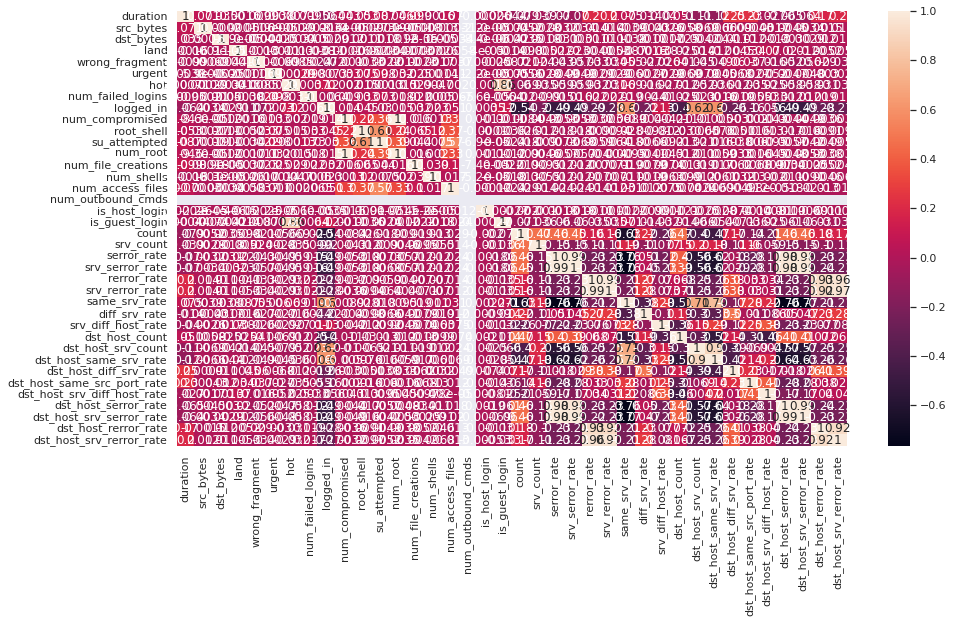

In [ ]:
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
y = traindata['status']
x = traindata.drop(['status'],axis=1)

## Univariate Selection

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(x, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)
# summarize selected features
print(features[0:5,:])


[3.005e+02 4.417e+00 2.136e+00 6.514e+00 1.169e+03 9.785e-01 2.157e+01
 1.776e+00 1.146e+05 1.310e+01 5.186e+01 6.351e+01 1.652e+01 5.702e+01
 1.130e+01 1.699e+02       nan 8.706e-01 1.947e+02 6.269e+04 7.483e-02
 9.248e+04 9.132e+04 8.644e+03 8.651e+03 1.639e+05 5.451e+03 1.821e+03
 2.062e+04 1.376e+05 1.169e+05 7.898e+03 1.086e+03 4.913e+02 9.307e+04
 9.465e+04 8.583e+03 8.646e+03]
[[0.00e+00 1.00e+00 2.50e+01 1.70e-01]
 [0.00e+00 8.00e-02 1.00e+00 0.00e+00]
 [0.00e+00 5.00e-02 2.60e+01 1.00e-01]
 [1.00e+00 1.00e+00 2.55e+02 1.00e+00]
 [1.00e+00 1.00e+00 2.55e+02 1.00e+00]]


In [ ]:
features

array([[0.0e+00, 1.0e+00, 2.5e+01, 1.7e-01],
       [0.0e+00, 8.0e-02, 1.0e+00, 0.0e+00],
       [0.0e+00, 5.0e-02, 2.6e+01, 1.0e-01],
       ...,
       [1.0e+00, 1.0e+00, 3.0e+01, 1.2e-01],
       [0.0e+00, 6.0e-02, 8.0e+00, 3.0e-02],
       [1.0e+00, 1.0e+00, 7.7e+01, 3.0e-01]])

## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
fit = rfe.fit(x, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 19
Selected Features: [False False False False  True False False False  True  True  True False
  True False False  True False False  True False False  True  True  True
  True  True  True False False False  True False  True  True  True  True
 False  True]
Feature Ranking: [16 17 18 10  1 13  4 14  1  1  1 11  1  3 12  1 20 19  1  7  8  1  1  1
  1  1  1  2 15  9  1  6  1  1  1  1  5  1]


In [ ]:
traindata.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'status'],
      dtype='object')

## Feature Importance

In [ ]:
# feature extraction
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[3.310e-03 1.949e-02 1.184e-02 4.226e-05 1.469e-02 4.226e-05 9.424e-03
 6.953e-04 1.140e-01 6.574e-03 2.327e-04 3.878e-05 3.006e-04 2.120e-04
 4.944e-05 1.015e-04 0.000e+00 7.755e-08 1.679e-03 2.987e-02 1.619e-02
 5.546e-02 5.630e-02 2.481e-02 2.095e-02 1.351e-01 7.828e-03 1.521e-02
 2.391e-02 8.131e-02 8.146e-02 1.981e-02 5.748e-02 2.444e-02 4.821e-02
 6.355e-02 2.837e-02 2.701e-02]


In [ ]:
IMP = []
for i in model.feature_importances_:
  if i>1.00e-02:
    IMP.append('YES')
  else:
    IMP.append('NO')


In [ ]:
IMP

['NO',
 'YES',
 'YES',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES']

In [ ]:
features = x.columns.tolist()
features[3]

'land'

In [ ]:
for i in range(len(IMP)):
  if IMP[i] == 'NO':
    x.drop(features[i],axis=1,inplace=True)
    print(i,' :DROPPED')
  else:
    print(i,' :NOT DROPPED')
    pass

0  :DROPPED
1  :NOT DROPPED
2  :NOT DROPPED
3  :DROPPED
4  :NOT DROPPED
5  :DROPPED
6  :DROPPED
7  :DROPPED
8  :NOT DROPPED
9  :DROPPED
10  :DROPPED
11  :DROPPED
12  :DROPPED
13  :DROPPED
14  :DROPPED
15  :DROPPED
16  :DROPPED
17  :DROPPED
18  :DROPPED
19  :NOT DROPPED
20  :NOT DROPPED
21  :NOT DROPPED
22  :NOT DROPPED
23  :NOT DROPPED
24  :NOT DROPPED
25  :NOT DROPPED
26  :DROPPED
27  :NOT DROPPED
28  :NOT DROPPED
29  :NOT DROPPED
30  :NOT DROPPED
31  :NOT DROPPED
32  :NOT DROPPED
33  :NOT DROPPED
34  :NOT DROPPED
35  :NOT DROPPED
36  :NOT DROPPED
37  :NOT DROPPED


In [ ]:
x

,src_bytes,dst_bytes,wrong_fragment,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,491,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,146,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,232,8153,0,1,5,5,0.2,0.2,0.0,0.0,1.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,199,420,0,1,30,32,0.0,0.0,0.0,0.0,1.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,105,145,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,2231,384,0,1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
y.value_counts()

normal     67343
anomaly    58630
Name: status, dtype: int64

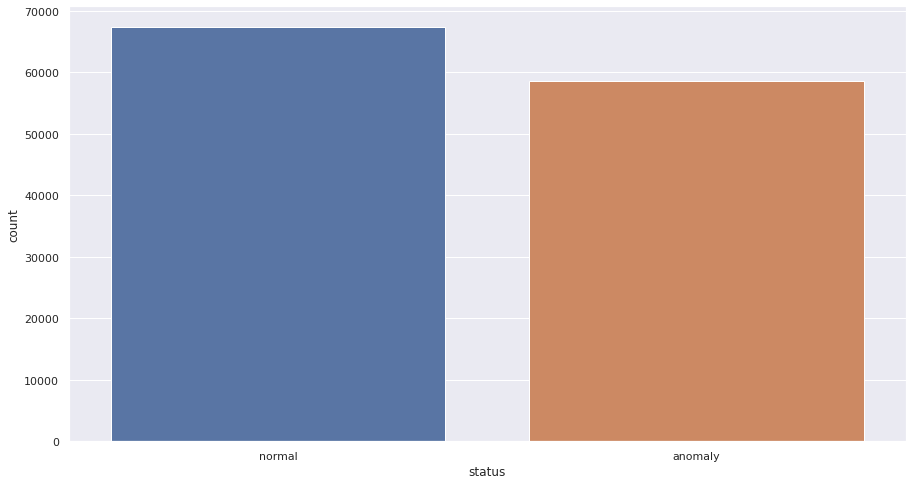

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(y, data=y)

In [ ]:
dict = {'normal':0,'anomaly':1}
y=y.map(dict)

In [ ]:
y

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: status, Length: 125973, dtype: int64

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = GradientBoostingClassifier(loss='deviance', #deviance or explonential
                               criterion='mse', #{‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’
                               learning_rate=0.1, # default 1.0
                               subsample=1.0, #default=1.0
                               random_state=0, # random state for reproducibility
                               max_features='sqrt', # number of random features to use sqrt(n_features)
                               min_samples_leaf=1000, # minimum no of observarions allowed in a leaf
                               max_depth=3, # maximum depth of the tree
                               n_estimators=500 # how many trees to build
                              )

In [ ]:
clf = model.fit(X_train, y_train)

In [ ]:
pred_labels_tr = model.predict(X_train)

In [ ]:
pred_labels_te = model.predict(X_test)

In [ ]:
# Basic info about the model
print('*************** Tree Summary ***************')
print('No. of classes: ', clf.n_classes_)
print('Classes: ', clf.classes_)
print('No. of features: ', clf.n_features_)
print('No. of Estimators: ', len(clf.estimators_))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Tree Summary ***************
No. of classes:  2
Classes:  [0 1]
No. of features:  22
No. of Estimators:  500
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9965469339154595
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      0.99      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9970628510190717
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53921
           1       1.00      1.00      1.00     46857

    accuracy                           1.00    100778
   macro avg       1.00   

## Using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
gsearch2.best_score_

0.9999730180904607

In [ ]:
gsearch2.best_estimator_

GradientBoostingClassifier(max_depth=15, max_features='sqrt',
                           min_samples_split=200, n_estimators=60,
                           random_state=10, subsample=0.8)

In [ ]:
gsearch2.best_params_

{'max_depth': 15, 'min_samples_split': 200}

In [ ]:
model = GradientBoostingClassifier(max_depth=15, max_features='sqrt',
                           min_samples_split=200, n_estimators=60,
                           random_state=10, subsample=0.8)

In [ ]:
clf = model.fit(X_train, y_train)

In [ ]:
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)

In [ ]:
# Basic info about the model
print('*************** Tree Summary ***************')
print('No. of classes: ', clf.n_classes_)
print('Classes: ', clf.classes_)
print('No. of features: ', clf.n_features_)
print('No. of Estimators: ', len(clf.estimators_))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Tree Summary ***************
No. of classes:  2
Classes:  [0 1]
No. of features:  22
No. of Estimators:  60
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9979757888469935
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9995336283712715
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53921
           1       1.00      1.00      1.00     46857

    accuracy                           1.00    100778
   macro avg       1.00    